Experiment 4

Group 6

20EC39002, 20EC39054

In [31]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [46]:
def conv2d(img, kernel):
  res = np.zeros((img.shape))
  n = img.shape[0]
  m = kernel.shape[0]
  img_p = np.zeros((img.shape[0] + 2*(m//2), img.shape[0] + 2*(m//2)))
  img_p[m//2:m//2 + n, m//2:m//2 + n] = img
  for y in range(n):
    for x in range(n):
      window = img_p[y:y+m, x:x+m]
      res[y, x] = (window* kernel).sum()
  return res

In [47]:
from cv2.gapi import Laplacian
class Filter_guy:
  '''
  Filter Container for all filters
  '''

  def mean(img, k=3, print_kernel=False):
    '''
    Mean Filter:
      n: Size of Kernel
    '''
    kernel = np.full((k, k), 1/(k*k))
    if print_kernel:
      print(kernel)
    return conv2d(img, kernel)


  def median(img, k=3):
    '''
    Median Filter
    '''
    res = np.zeros((img.shape))
    n = img.shape[0]
    for y in range(n):
      for x in range(n):
        l = x - k//2
        r = x + k//2
        t = y - k//2
        b = y + k//2
        l = max(0, l)
        r = min(r, n-1)
        t = max(0, t)
        b = min(b, n-1)
        window = img[t:b+1, l:r+1]
        window = window.flatten()
        res[y, x] = np.median(window)
    return res

  def prewitt(img):
    Px = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])

    Py = np.array([[ 1, 1, 1],
                   [ 0, 0, 0],
                   [-1,-1,-1]])

    Gx = 255*np.abs(conv2d(img, Px)/765)
    Gy = 255*np.abs(conv2d(img, Py)/765)
    G = np.sqrt(Gx**2 + Gy**2)
    return G

  def laplacian(img):
    kernel1 = np.array([[ 0, -1,  0],
                        [-1,  4, -1],
                        [ 0, -1,  0]])
    kernel2 = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])
    lap1 = 255*np.abs(conv2d(img, kernel1))/1020
    lap2 = 255*np.abs(conv2d(img, kernel2))/2040
    return lap1, lap2

  def sobel(img):
    '''
    Sobel filter (horizontal, vertical, left diagonal, right diagonal)
    '''
    Sx = np.array([[ 1, 0,-1],
                   [ 2, 0,-2],
                   [ 1, 0,-1]])

    Sy = np.array([[ 1, 2, 1],
                   [ 0, 0, 0],
                   [-1,-2,-1]])

    Sd_l = np.array([[ 0, 1, 2],
                     [-1, 0, 1],
                     [-2,-1, 0]])

    Sd_r = np.array([[-2,-1, 0],
                     [-1, 0, 1],
                     [ 0, 1, 2]])

    Gx = 255*np.abs(conv2d(img, Sx)/1020)
    Gy = 255*np.abs(conv2d(img, Sy)/1020)
    G_ld = 255*np.abs(conv2d(img, Sd_l)/1020)
    G_rd = 255*np.abs(conv2d(img, Sd_r)/1020)
    return Gx, Gy, G_ld, G_rd


  def gaussian(img, k=3, sig=1, print_kernel=False):
    ax = np.linspace(-(k - 1) / 2., (k - 1) / 2., k)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    kernel = kernel / np.sum(kernel)
    if print_kernel:
      print('Gaussian Kernel', kernel)
    return conv2d(img, kernel)

  def lap_gauss(img, k=3, sig=1):
    res = Filter_guy.gaussian(img, k, sig)
    lg1,lg2 = Filter_guy.laplacian(res)
    return lg1

In [56]:
def apply_all_filter(img, dir):
  plt.matshow(img, cmap='gray')
  plt.title('Original Image')
  plt.show()
  mean = Filter_guy.mean(img, 3)
  cv.imwrite(dir+'/Mean Filter Output', mean)
  plt.matshow(mean, cmap='gray')
  plt.title('Mean Filter Output')
  plt.show()
  median = Filter_guy.median(img, 3)
  cv.imwrite(dir+'/Median Filter Output', median)
  plt.matshow(median, cmap='gray')
  plt.title('Median Filter Output')
  plt.show()
  prewitt = Filter_guy.prewitt(img)
  cv.imwrite(dir+'/Prewitt Filter Output', prewitt)
  plt.matshow(prewitt, cmap='gray')
  plt.title('Prewitt Filter Output')
  plt.show()
  lap1, lap2 = Filter_guy.laplacian(img)
  cv.imwrite(dir+'/Lap1 Filter Output', lap1)
  cv.imwrite(dir+'/Lap2 Filter Output', lap2)
  plt.matshow(lap1, cmap='gray')
  plt.title('Type 1 Laplacian Filter Output')
  plt.show()
  plt.matshow(lap2, cmap='gray')
  plt.title('Type 2 Laplacian Filter Output')
  plt.show()
  Sx, Sy, S_ld, S_rd = Filter_guy.sobel(img)
  cv.imwrite(dir+'/Horizontal Sobel Filter Output', Sx)
  cv.imwrite(dir+'/Vertical Sobel Filter Output', Sy)
  cv.imwrite(dir+'/Left diagnal Sobel Filter Output', S_ld)
  cv.imwrite(dir+'/Right diagnal Sobel Filter Output', S_rd)
  plt.matshow(Sx, cmap='gray')
  plt.title('Horizontal Sobel Filter Output')
  plt.show()
  plt.matshow(Sy, cmap='gray')
  plt.title('Vertical Sobel Filter Output')
  plt.show()
  plt.matshow(S_ld, cmap='gray')
  plt.title('Left diagnal Sobel Filter Output')
  plt.show()
  plt.matshow(S_rd, cmap='gray')
  plt.title('Right diagnal Sobel Filter Output')
  plt.show()
  gaussian = Filter_guy.gaussian(img, 3, 1)
  cv.imwrite(dir+'/Gaussian Filter Output', gaussian)
  plt.matshow(gaussian, cmap='gray')
  plt.title('Gaussian Filter Output')
  plt.show()
  LoG = Filter_guy.lap_gauss(img)
  cv.imwrite(dir+'/Type1 Laplacian of Gaussian Filter Output', LoG)
  plt.matshow(LoG, cmap='gray')
  plt.title('Type1 Laplacian of Gaussian Filter Output')
  plt.show()


Input block for image stack

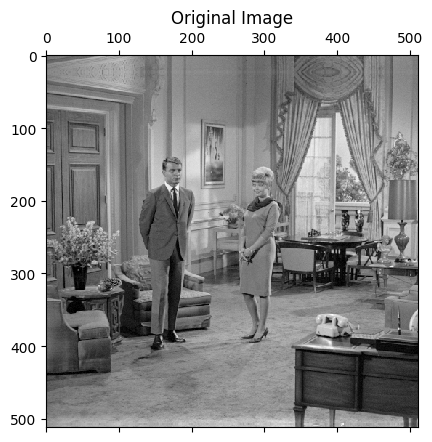

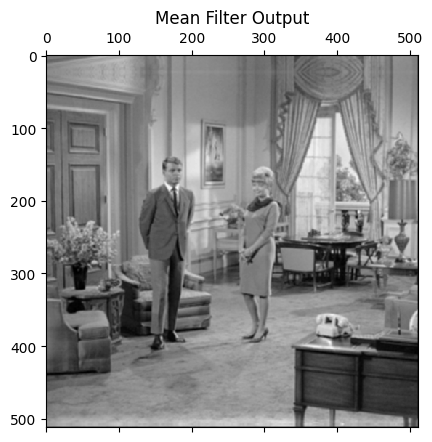

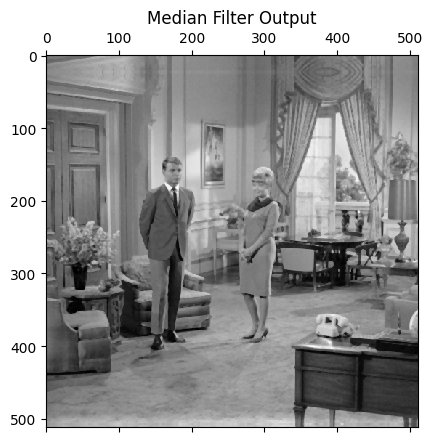

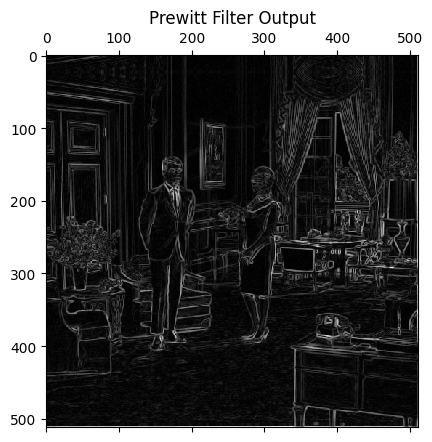

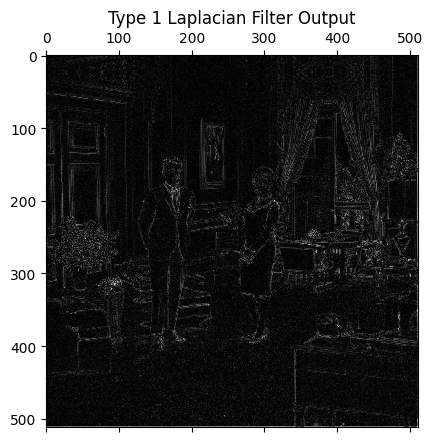

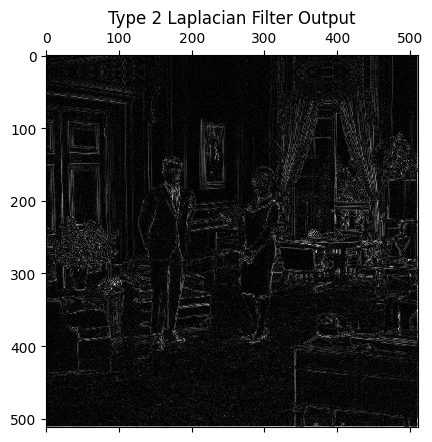

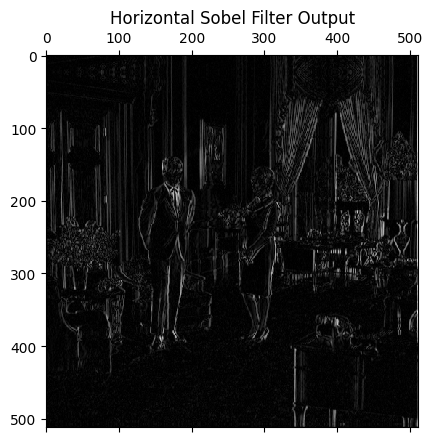

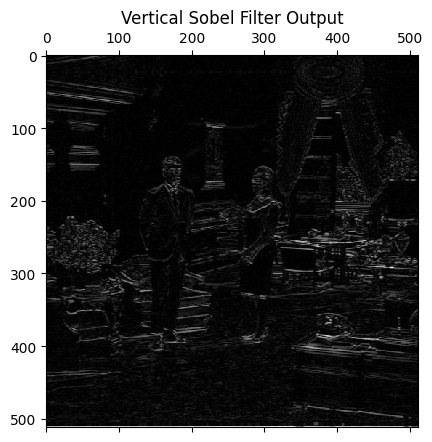

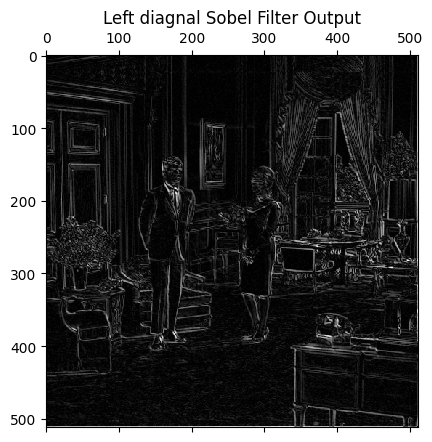

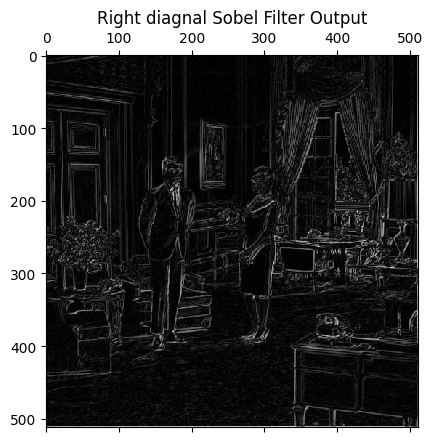

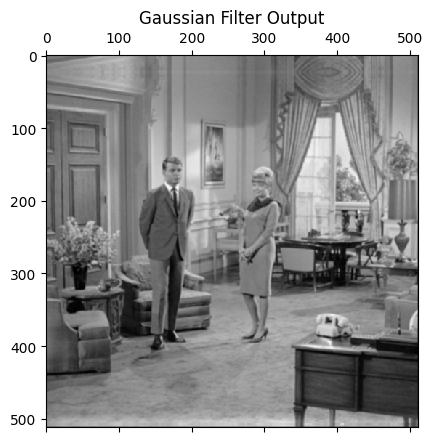

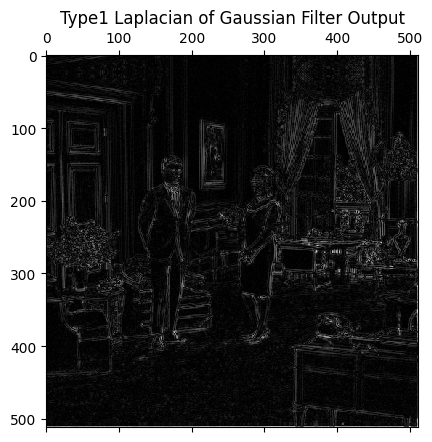

In [61]:
import os
# path to the input and output folder
IN_DIR = r"/content/folder"
OUT_DIR = r"/content/output"
# Max number of images to apply filter
MAX_INPUT = 1
paths = os.listdir(IN_DIR)
count = 0
for path in paths:
  if(count >= MAX_INPUT):
    break
  count+=1
  img_path = os.path.join(IN_DIR, path)
  img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
  apply_all_filter(img, os.path.join(OUT_DIR, path))

Q2

In [ ]:
def Gaussian_Unblur(blur_img, thresh, max_itr=20, sig=1, print_kernel=False):
  ax = np.linspace(-(3 - 1) / 2., (3 - 1) / 2., 3)
  gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
  kernel = np.outer(gauss, gauss)
  kernel = kernel / np.sum(kernel)
  if print_kernel:
    print('Gaussian Kernel', kernel)
  Ik = np.copy(blur_img)
  for i in range(max_itr):
    print('iteration : ', i+1)
    Ak = conv2d(Ik, kernel)
    Bk = blur_img/Ak
    Ck = conv2d(Bk, kernel)
    Ikn = Ik*Ck
    plt.matshow(Ikn, cmap='gray')
    plt.show()
    if np.abs(Ik[0,0] - Ikn[0,0]) < thresh:
      return Ikn
    Ik = Ikn
  return Ikn

In [ ]:
unblur = Gaussian_Unblur(gaussian, 0)

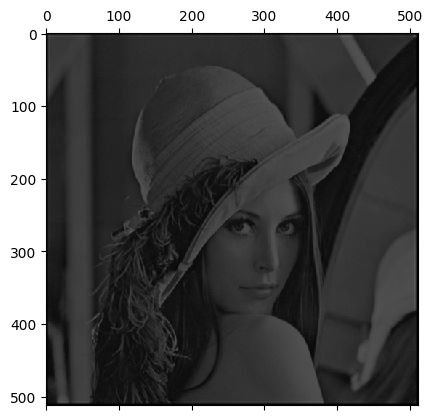

In [60]:
plt.matshow(unblur+100, cmap='gray')